In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')
from utils import deserialize, serialize, deserialize_model

## Select top models 

In [4]:
import pandas as pd
df = pd.read_csv("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_parallel.csv")

In [5]:
pd.set_option('display.max_rows', 50)

In [6]:
df.sort_values(by="aucs", ascending=False).head(50)

,Unnamed: 0,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
81,81,k9_r3_alpha10000000000.0000_tau0.00_lamnan,81,0.358767,7.396960,0.648615,1.000000,1.000000,0.858006,0.790121,0.865610,0.798874,0.933457,0.864035,0.974111,0.913165,prospected
157,157,k9_r2_alpha10000000000.0000_tau0.00_lamnan,157,0.368705,6.931584,0.644631,1.000000,1.000000,0.857690,0.779687,0.851934,0.777750,0.940299,0.869388,0.972675,0.940568,prospected
120,120,k9_r7_alpha10000000000.0000_tau0.00_lamnan,120,0.347747,9.504966,0.658231,0.998462,0.960784,0.856431,0.789200,0.868475,0.794314,0.952307,0.893701,0.964677,0.914956,prospected
137,137,k9_r8_alpha10000000000.0000_tau0.00_lamnan,137,0.346876,9.509272,0.660477,1.000000,1.000000,0.855723,0.783491,0.865213,0.794376,0.946201,0.886719,0.984710,0.952663,prospected
54,54,k8_r7_alpha10000000000.0000_tau0.00_lamnan,54,0.345817,9.242678,0.658499,1.000000,1.000000,0.855247,0.786530,0.860552,0.789153,0.954492,0.891391,0.977988,0.918841,prospected
66,66,k9_r4_alpha10000000000.0000_tau0.00_lamnan,66,0.358297,8.003728,0.649875,1.000000,1.000000,0.854901,0.776251,0.853656,0.781523,0.941016,0.885387,0.971671,0.933526,prospected
90,90,k8_r6_alpha10000000000.0000_tau0.00_lamnan,90,0.341311,9.350190,0.663290,0.977778,0.980392,0.854211,0.783788,0.859215,0.792345,0.959071,0.897196,0.974781,0.923529,prospected
60,60,k8_r8_alpha10000000000.0000_tau0.00_lamnan,60,0.348126,9.087579,0.658059,0.995385,0.941176,0.853679,0.778491,0.856446,0.788479,0.953330,0.887863,0.972519,0.945946,prospected
75,75,k8_r3_alpha10000000000.0000_tau0.00_lamnan,75,0.349954,8.124861,0.657944,1.000000,1.000000,0.853232,0.780465,0.858592,0.785342,0.942913,0.882353,0.975402,0.941828,prospected
113,113,k9_r1_alpha10000000000.0000_tau0.00_lamnan,113,0.360732,6.053812,0.652760,1.000000,0.980392,0.852772,0.776602,0.851212,0.783338,0.948643,0.876053,0.974874,0.922705,prospected


In [7]:
df[df["idx"] == 81] # 60,9 used to be top 

,Unnamed: 0,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
81,81,k9_r3_alpha10000000000.0000_tau0.00_lamnan,81,0.358767,7.39696,0.648615,1.0,1.0,0.858006,0.790121,0.86561,0.798874,0.933457,0.864035,0.974111,0.913165,prospected


In [8]:
# df[df["idx"] == 43]

In [9]:
# df[df["idx"] == 4] # used to be 46, before realized TNR is actually FPR

In [10]:
# model_str1 = "k14_r2_alpha10000000000.0000_tau0.00_lamnan.model"
# model_str3 = "k8_r8_alpha10000000000.0000_tau0.00_lamnan.model"
# model_str2 = "k12_r1_alphanan_taunan_lam0.50.model"
#"k8_r1_alphanan_taunan_lam0.50.model"

In [5]:
model_str = "k9_r3_alpha10000000000.0000_tau0.00_lamnan.model"
# "k9_r2_alpha10000000000.0000_tau0.00_lamnan.model"
# "k8_r6_alpha10000000000.0000_tau0.00_lamnan.model"

## Prospect

In [6]:
model_dir = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2models"
# model_path1 = os.path.join(model_dir, model_str1)
# model_path2 = os.path.join(model_dir, model_str2)
# model_path3 = os.path.join(model_dir, model_str3)
model_path = os.path.join(model_dir, model_str)

G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/"
save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc"

# save_dir1 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd"
#"/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc"
# save_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_tnr"

label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [7]:
# model1 = deserialize_model(model_path1)
# model2 = deserialize_model(model_path2)
# model3 = deserialize_model(model_path3)

model = deserialize_model(model_path)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


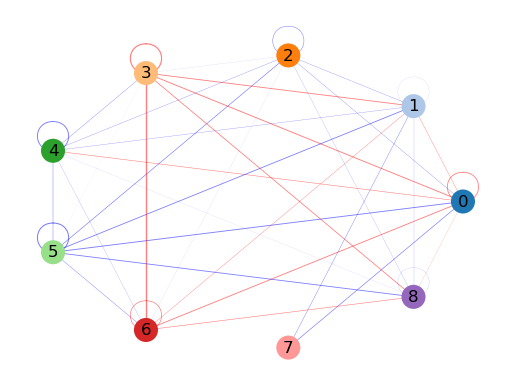

In [14]:
model.visualize_motif_graph(labels=True) 

In [15]:
model.w_hmap

{0: 0.04857302716465828,
 1: -0.006000716118267908,
 2: -0.05707136947000024,
 3: 0.09390889910911338,
 4: -0.06609676018326437,
 5: -0.10304699124128582,
 6: 0.051728608104363055,
 7: 0.0,
 8: -0.005219651334594083,
 (0, 0): 0.10072317025776392,
 (0, 1): 0.047578228251838724,
 (0, 2): -0.04229988126924365,
 (0, 3): 0.11098707028498292,
 (0, 4): 0.06712115388603297,
 (0, 5): -0.11028828274864391,
 (0, 6): 0.10640059772965522,
 (0, 7): -0.08204556514774888,
 (0, 8): 0.023142366975525696,
 (1, 1): -0.013284648202265683,
 (1, 2): -0.04046601537406552,
 (1, 3): 0.1038789187485831,
 (1, 4): -0.038650448631535675,
 (1, 5): -0.10249075290056314,
 (1, 6): 0.04893526799056475,
 (1, 7): -0.05355862349498658,
 (1, 8): -0.023983971619094928,
 (2, 2): -0.06306593045482471,
 (2, 3): -0.011283951378897789,
 (2, 4): -0.04133761393958537,
 (2, 5): -0.08060023917480354,
 (2, 6): -0.010785140805080137,
 (2, 7): 0.0,
 (2, 8): -0.02750161941108336,
 (3, 3): 0.14227465960831495,
 (3, 4): -0.0457908730297435

16
(0, 0.04857302716465828)
(3, 0.09390889910911338)
(6, 0.051728608104363055)
((0, 0), 0.10072317025776392)
((0, 1), 0.047578228251838724)
((0, 3), 0.11098707028498292)
((0, 4), 0.06712115388603297)
((0, 6), 0.10640059772965522)
((0, 8), 0.023142366975525696)
((1, 3), 0.1038789187485831)
((1, 6), 0.04893526799056475)
((3, 3), 0.14227465960831495)
((3, 6), 0.16896555578165348)
((3, 8), 0.09641334848649487)
((6, 6), 0.0874583835899926)
((6, 8), 0.07046477838083577)


(array([ 2.79567939,  2.79567939,  1.86378626,  5.59135878,  4.65946565,
         7.45514504, 10.25082443,  0.93189313,  2.79567939,  1.86378626,
         1.86378626,  4.65946565,  0.93189313,  0.93189313,  0.93189313]),
 array([-0.12911345, -0.10924152, -0.08936958, -0.06949765, -0.04962572,
        -0.02975378, -0.00988185,  0.00999009,  0.02986202,  0.04973395,
         0.06960589,  0.08947782,  0.10934975,  0.12922169,  0.14909362,
         0.16896556]),
 <BarContainer object of 15 artists>)

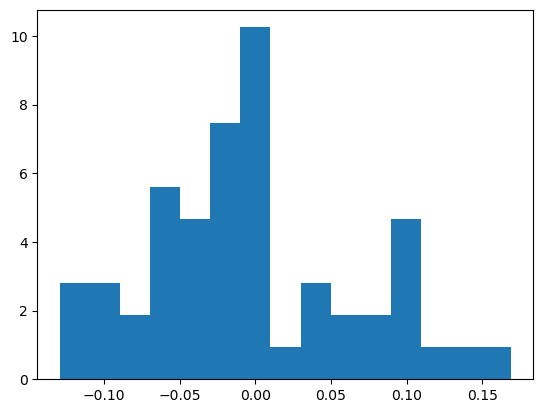

In [16]:
import matplotlib.pyplot as plt
betas = model.w_hmap
betas_pos = {}
for b in betas.items():
    if b[1] > 0:
        betas_pos[b[0]] = b[1]
        
print(len(betas_pos.keys()))
for b in betas_pos.items():
    print(b)


plt.hist(betas.values(), bins=15, density=True)

(array([10.71503108,  4.28601243, 12.85803729,  2.14300622,  4.28601243]),
 array([0.02314237, 0.052307  , 0.08147164, 0.11063628, 0.13980092,
        0.16896556]),
 <BarContainer object of 5 artists>)

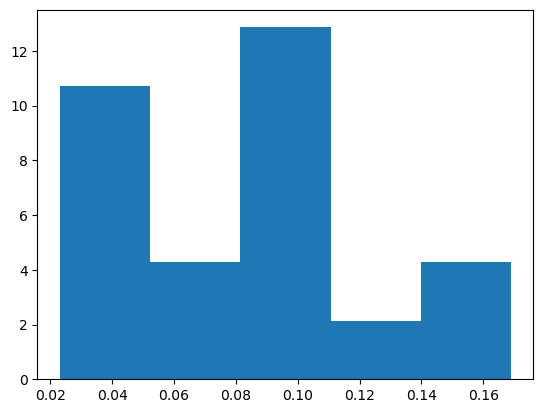

In [17]:
plt.hist(betas_pos.values(), bins=5, density=True)

In [18]:
betas_pos

{0: 0.04857302716465828,
 3: 0.09390889910911338,
 6: 0.051728608104363055,
 (0, 0): 0.10072317025776392,
 (0, 1): 0.047578228251838724,
 (0, 3): 0.11098707028498292,
 (0, 4): 0.06712115388603297,
 (0, 6): 0.10640059772965522,
 (0, 8): 0.023142366975525696,
 (1, 3): 0.1038789187485831,
 (1, 6): 0.04893526799056475,
 (3, 3): 0.14227465960831495,
 (3, 6): 0.16896555578165348,
 (3, 8): 0.09641334848649487,
 (6, 6): 0.0874583835899926,
 (6, 8): 0.07046477838083577}

In [20]:
{k: v for k, v in sorted(betas_pos.items(), key=lambda item: item[1], reverse=True)}


{(3, 6): 0.16896555578165348,
 (3, 3): 0.14227465960831495,
 (0, 3): 0.11098707028498292,
 (0, 6): 0.10640059772965522,
 (1, 3): 0.1038789187485831,
 (0, 0): 0.10072317025776392,
 (3, 8): 0.09641334848649487,
 3: 0.09390889910911338,
 (6, 6): 0.0874583835899926,
 (6, 8): 0.07046477838083577,
 (0, 4): 0.06712115388603297,
 6: 0.051728608104363055,
 (1, 6): 0.04893526799056475,
 0: 0.04857302716465828,
 (0, 1): 0.047578228251838724,
 (0, 8): 0.023142366975525696}

In [19]:
# from utils import visualize_kernel_chord
# visualize_kernel_chord(betas)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


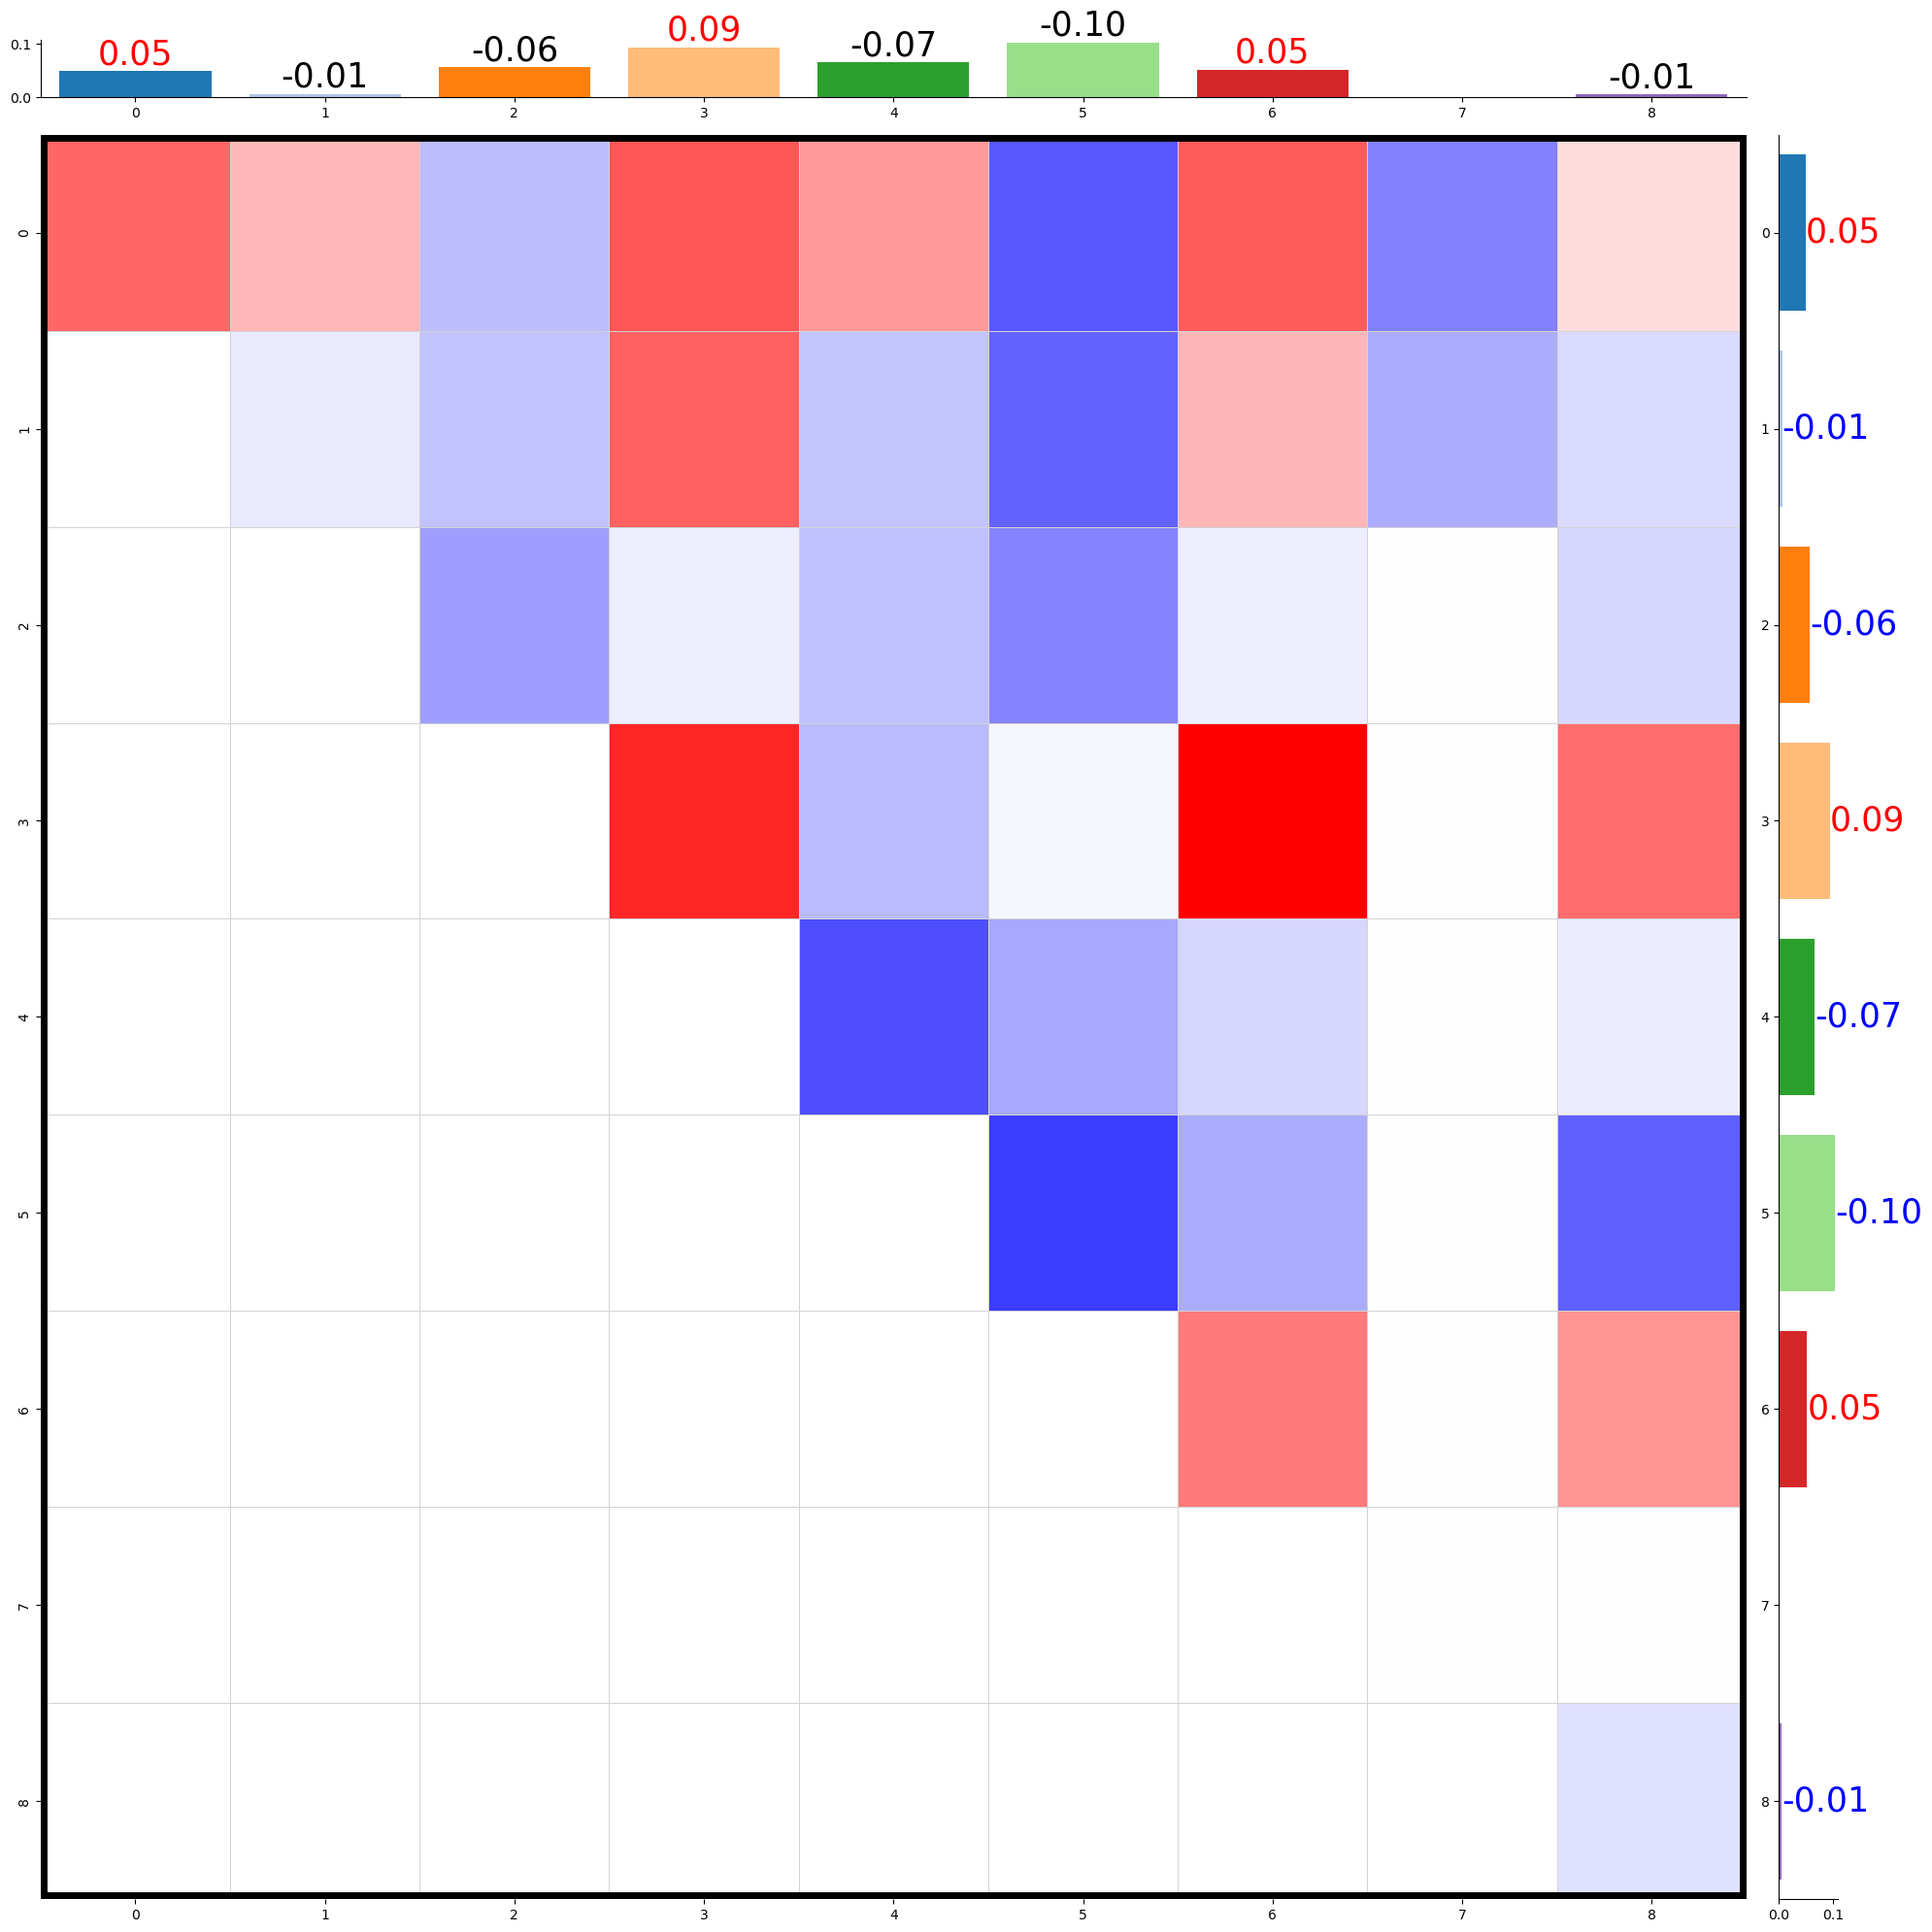

In [20]:
model.visualize_motif_graph(style="matrix")

In [21]:
# model3.visualize_motif_graph(labels=True)

In [22]:
# model3.visualize_motif_graph(style="matrix")

In [23]:
from test_signal import generate_hypotheses_for_model

save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc"
print(len(os.listdir(save_dir)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir, notebook_flag=True)

109


In [24]:
save_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_positive"
print(len(os.listdir(save_dir2)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir2, notebook_flag=True, thresh_style="sign")

109


In [25]:
save_dir3 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_decay"
print(len(os.listdir(save_dir3)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir3, notebook_flag=True, prospect_style="decay")

109


In [26]:
save_dir4 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_positive_decay"
print(len(os.listdir(save_dir4)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir4, notebook_flag=True, thresh_style="sign", prospect_style="decay")

109


In [27]:
# generate_hypotheses_for_model(model2, label_dict, G_dir, save_dir2, notebook_flag=True)

In [28]:
# from test_signal import generate_join_hypotheses    
# G_dir1 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd"
# # "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc"
# G_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_tnr"
# save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint2"
# #"/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint"
# # generate_join_hypotheses(G_dir1, G_dir2, save_dir, notebook_flag=True)

## Let's get frequencies of monograms and bigrams

In [29]:
# model.create_train_array()

In [30]:
# X = model.training_data
# y = model.labels

In [8]:
import numpy as np
cache_dir = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/top_model_results"
# np.save(os.path.join(cache_dir, "X_raw.npy"), X)
# np.save(os.path.join(cache_dir, "y_raw.npy"), y)
X = np.load(os.path.join(cache_dir, "X_raw.npy"))
y = np.load(os.path.join(cache_dir, "y_raw.npy"))

In [9]:
species = [str(s) for s in model.w_hmap.keys()]
y = y.astype(int)
X0 = X[y==0,:]
X1 = X[y==1,:]
sum0 = np.sum(X0, axis=0)
sum1 = np.sum(X1, axis=0)

In [10]:
n1 = np.sum(y)
n0 = len(y) - n1

<Figure size 640x480 with 0 Axes>

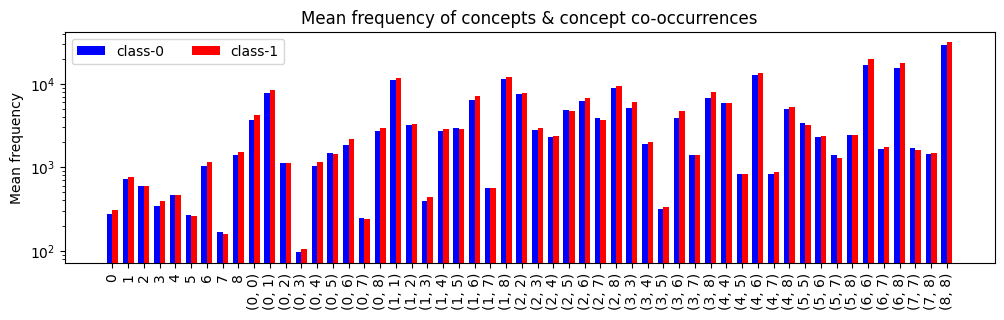

In [17]:
import matplotlib.pyplot as plt

x = np.arange(len(species))  # the label locations
species_sums = {
    "class-0": sum0 / n0,
    "class-1": sum1 / n1
}

width = 0.35  # the width of the bars
multiplier = 0

colors = ["blue", "red"]
plt.figure()
fig, ax = plt.subplots(figsize=(12, 3))
for attribute, measurement in species_sums.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, align='edge', color=colors[multiplier])
    # ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean frequency')
ax.set_title('Mean frequency of concepts & concept co-occurrences')
ax.set_xticks(x + width, species, rotation=90)
ax.legend(loc='upper left', ncols=2)
# ax.set_ylim(0, 250)
# ax.set_xlim()
ax.set_yscale("log")

plt.show()


<Figure size 640x480 with 0 Axes>

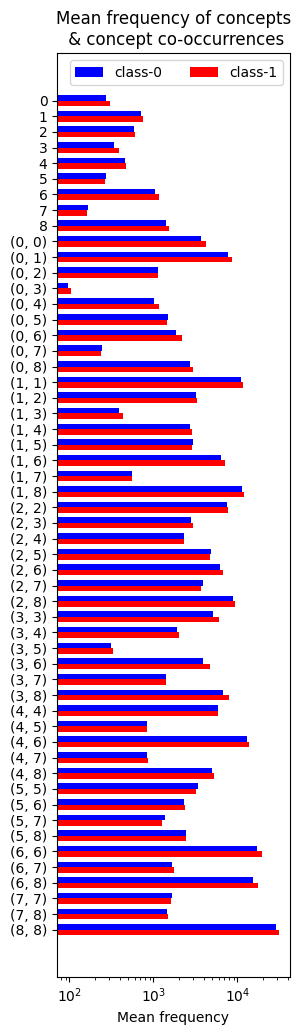

In [24]:
import matplotlib.pyplot as plt

x = np.arange(len(species))  # the label locations
species_sums = {
    "class-0": sum0 / n0,
    "class-1": sum1 / n1
}

width = 0.35  # the width of the bars
multiplier = 0

colors = ["blue", "red"]
plt.figure()
fig, ax = plt.subplots(figsize=(3, 12))
for attribute, measurement in species_sums.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute, align='edge', color=colors[multiplier])
    # ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Mean frequency')
ax.set_title('Mean frequency of concepts\n & concept co-occurrences')
ax.set_yticks(x + width, species, rotation=0)
ax.legend(loc='upper right', ncols=2)
# ax.set_ylim(0, 250)
# ax.set_xlim()
ax.set_xscale("log")
plt.gca().invert_yaxis()

plt.show()

In [57]:
n = X.shape[0]
doc_freq = np.count_nonzero(X, axis=0)
idf = np.log(n / (1+doc_freq))
tf = X / np.sum(X, axis=1).reshape(-1,1)
X_scaled = tf * idf
X0 = X_scaled[y==0,:]
X1 = X_scaled[y==1,:]
EPS = 1e-10

mu0 = np.mean(X0, axis=0)
mu1 = np.mean(X1, axis=0)
log2fc = np.log2((mu1 + EPS)/(mu0 + EPS))


In [58]:
log2fc

array([ 0.04857303, -0.00600072, -0.05707137,  0.0939089 , -0.06609676,
       -0.10304699,  0.05172861,  0.        , -0.00521965,  0.10072317,
        0.04757823, -0.04229988,  0.11098707,  0.06712115, -0.11028828,
        0.1064006 , -0.08204557,  0.02314237, -0.01328465, -0.04046602,
        0.10387892, -0.03865045, -0.10249075,  0.04893527, -0.05355862,
       -0.02398397, -0.06306593, -0.01128395, -0.04133761, -0.08060024,
       -0.01078514,  0.        , -0.02750162,  0.14227466, -0.04579087,
       -0.00574203,  0.16896556,  0.        ,  0.09641335, -0.11678268,
       -0.05760605, -0.02778605,  0.        , -0.01200501, -0.12911345,
       -0.05401204,  0.        , -0.10408199,  0.08745838,  0.        ,
        0.07046478,  0.        ,  0.        , -0.01998884])

In [52]:
model.B

array([ 0.04857303, -0.00600072, -0.05707137,  0.0939089 , -0.06609676,
       -0.10304699,  0.05172861,  0.        , -0.00521965,  0.10072317,
        0.04757823, -0.04229988,  0.11098707,  0.06712115, -0.11028828,
        0.1064006 , -0.08204557,  0.02314237, -0.01328465, -0.04046602,
        0.10387892, -0.03865045, -0.10249075,  0.04893527, -0.05355862,
       -0.02398397, -0.06306593, -0.01128395, -0.04133761, -0.08060024,
       -0.01078514,  0.        , -0.02750162,  0.14227466, -0.04579087,
       -0.00574203,  0.16896556,  0.        ,  0.09641335, -0.11678268,
       -0.05760605, -0.02778605,  0.        , -0.01200501, -0.12911345,
       -0.05401204,  0.        , -0.10408199,  0.08745838,  0.        ,
        0.07046478,  0.        ,  0.        , -0.01998884])

In [53]:
betas

{0: 0.04857302716465828,
 1: -0.006000716118267908,
 2: -0.05707136947000024,
 3: 0.09390889910911338,
 4: -0.06609676018326437,
 5: -0.10304699124128582,
 6: 0.051728608104363055,
 7: 0.0,
 8: -0.005219651334594083,
 (0, 0): 0.10072317025776392,
 (0, 1): 0.047578228251838724,
 (0, 2): -0.04229988126924365,
 (0, 3): 0.11098707028498292,
 (0, 4): 0.06712115388603297,
 (0, 5): -0.11028828274864391,
 (0, 6): 0.10640059772965522,
 (0, 7): -0.08204556514774888,
 (0, 8): 0.023142366975525696,
 (1, 1): -0.013284648202265683,
 (1, 2): -0.04046601537406552,
 (1, 3): 0.1038789187485831,
 (1, 4): -0.038650448631535675,
 (1, 5): -0.10249075290056314,
 (1, 6): 0.04893526799056475,
 (1, 7): -0.05355862349498658,
 (1, 8): -0.023983971619094928,
 (2, 2): -0.06306593045482471,
 (2, 3): -0.011283951378897789,
 (2, 4): -0.04133761393958537,
 (2, 5): -0.08060023917480354,
 (2, 6): -0.010785140805080137,
 (2, 7): 0.0,
 (2, 8): -0.02750161941108336,
 (3, 3): 0.14227465960831495,
 (3, 4): -0.0457908730297435

## Get tf-idf scaled values

In [35]:
X_tfidf = model.training_data
y = y.astype(int)
X0_tfidf = X_tfidf[y==0,:]
X1_tfidf = X_tfidf[y==1,:]
sum0 = np.sum(X0_tfidf, axis=0)
sum1 = np.sum(X1_tfidf, axis=0)

In [43]:
X_tfidf.shape

(254, 54)

In [54]:
X_tfidf

array([[-6.66276791e-06, -1.06634031e-05, -1.17788218e-05, ...,
         0.00000000e+00,  0.00000000e+00, -5.69517934e-04],
       [-6.27791988e-06, -1.13313538e-05, -1.04761573e-05, ...,
         0.00000000e+00,  0.00000000e+00, -5.52068224e-04],
       [-4.28379195e-06, -1.06694444e-05, -8.40744215e-06, ...,
         0.00000000e+00,  0.00000000e+00, -5.46723952e-04],
       ...,
       [-4.01998752e-06, -1.18676187e-05, -1.00980548e-05, ...,
         0.00000000e+00,  0.00000000e+00, -4.68222757e-04],
       [-4.00666170e-06, -1.25109976e-05, -7.32590596e-06, ...,
         0.00000000e+00,  0.00000000e+00, -6.22073511e-04],
       [-6.94189434e-06, -1.43262999e-05, -1.05649547e-05, ...,
         0.00000000e+00,  0.00000000e+00, -6.01759909e-04]])

<Figure size 640x480 with 0 Axes>

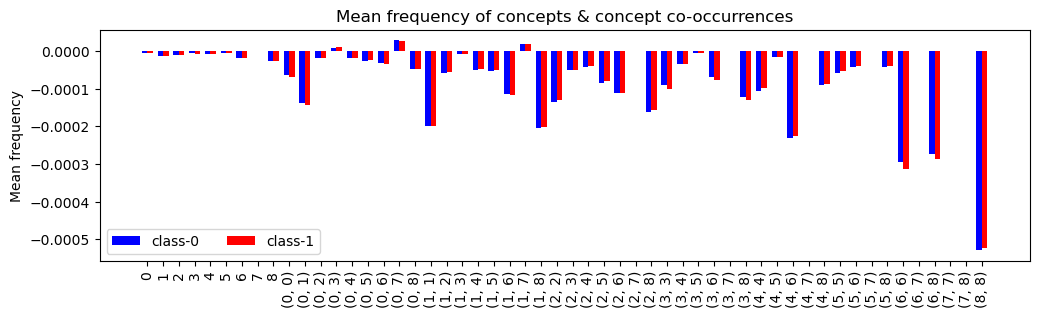

In [42]:
x = np.arange(len(species))  # the label locations
species_sums = {
    "class-0": sum0 / n0,
    "class-1": sum1 / n1
}

width = 0.35  # the width of the bars
multiplier = 0

colors = ["blue", "red"]
plt.figure()
fig, ax = plt.subplots(figsize=(12, 3))
for attribute, measurement in species_sums.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, align='edge', color=colors[multiplier])
    # ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean frequency')
ax.set_title('Mean frequency of concepts & concept co-occurrences')
ax.set_xticks(x + width, species, rotation=90)
ax.legend(loc='lower left', ncols=2)
# ax.set_ylim(0, 250)
# ax.set_xlim()
ax.set_yscale("linear")

plt.show()

## let's visualize some examples

In [177]:
ID = 87#312

min/max values: 1.0 2.0
using extended colormap
unique cell types: [1.0, 2.0]


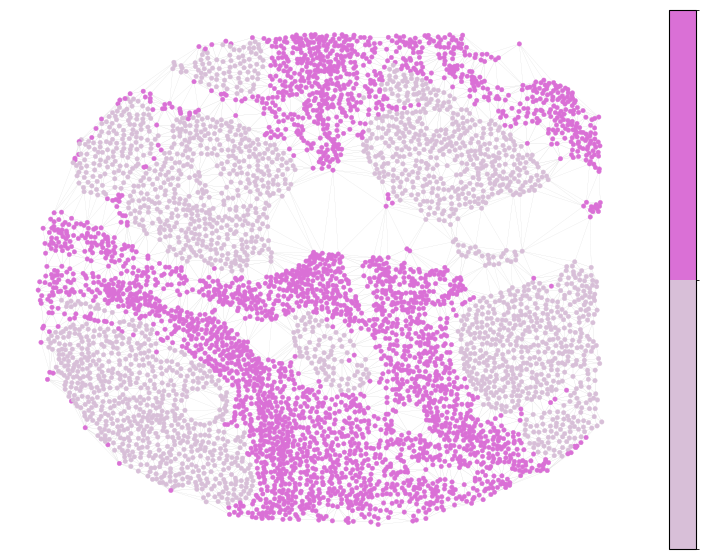

In [178]:
from utils import visualize_cell_graph, deserialize

G_og = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/S" + str(ID) + ".obj"
G_og = deserialize(G_og)

visualize_cell_graph(G_og, key="cell_type", prospect_flag=False, binarized_flag=False, edge_flag=True)

In [179]:
# label_dict

In [180]:
# valid_IDs = []
# for G_id in os.listdir(G_dir):
#     IDX = int(G_id.split(".")[0].split("S")[1])
#     if IDX in label_dict.keys():
#         if label_dict[IDX] == 1:
#             valid_IDs.append(IDX)
# print(sorted(valid_IDs))

class label: 1
min/max values: 0 1


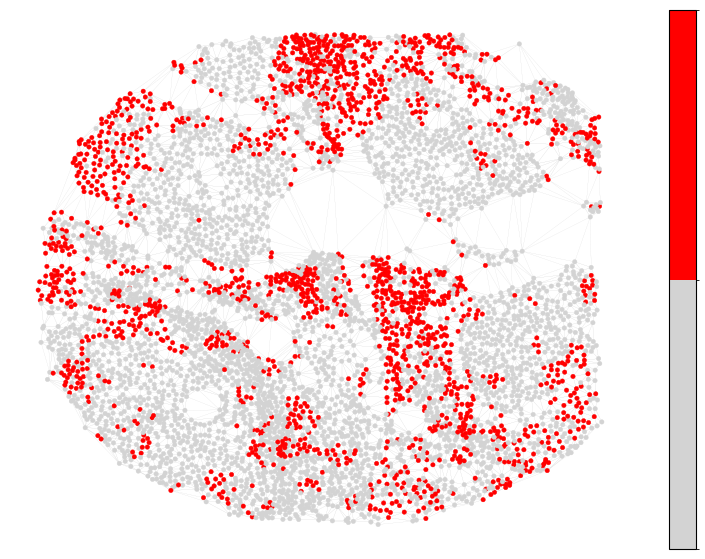

In [181]:
y = label_dict[ID]
print("class label:", y)
G_ex = save_dir + "/S" + str(ID) + "_bin.obj"
G_ex = deserialize(G_ex)

visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

In [182]:
# G_ex = save_dir2 + "/S" + str(ID) + "_bin.obj"
# G_ex = deserialize(G_ex)
# visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

In [183]:
# G_ex = save_dir3 + "/S" + str(ID) + "_bin.obj"
# G_ex = deserialize(G_ex)
# visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

In [184]:
# G_ex = save_dir4 + "/S" + str(ID) + "_bin.obj"
# G_ex = deserialize(G_ex)
# visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

### let's show cell concepts

In [185]:
from utils import deserialize, deserialize_model
proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2processors/k9.processor"
# proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2processors/k14.processor"
proc = deserialize_model(proc_path)

In [186]:
from utils import construct_sprite
G_og = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/S" + str(ID) + ".obj"
G_og = deserialize(G_og)
S = construct_sprite(G_og, proc, key_in="emb", key_out="concept")

min/max values: 0 8
using extended colormap
unique cell types: [0, 1, 2, 3, 4, 5, 6, 7, 8]


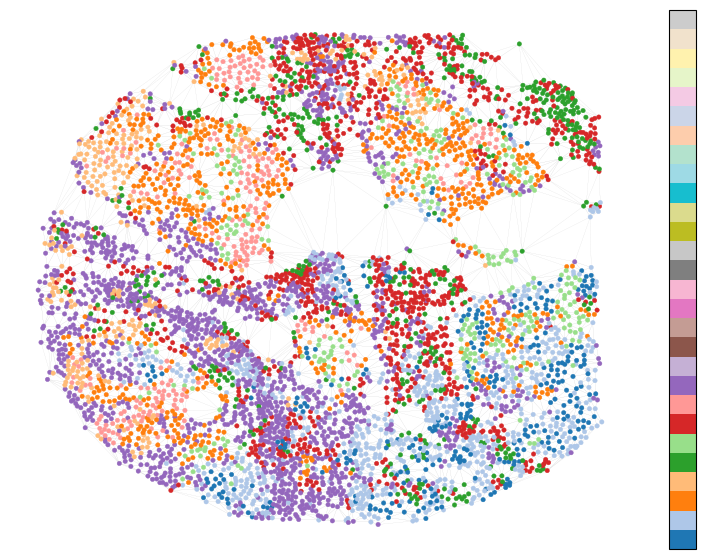

In [187]:
visualize_cell_graph(S, key="concept", node_colors=None, edge_flag=True)

In [188]:
# from test_signal import graph_element_add
# S_shift1 = graph_element_add(S, 1, "concept")
# # visualize_cell_graph(S_shift1, key="concept", node_colors=None)

In [189]:
# from test_signal import graph_hadamard, graph_element_assign
# import numpy as np
# S_cut = graph_hadamard(S_shift1, G_ex, "concept", "emb")
# print([S_cut.nodes[n]["concept"] for n in S_cut.nodes])
# S_drop = graph_element_assign(S_cut, 0, np.nan, "concept")
# print([S_drop.nodes[n]["concept"] for n in S_drop.nodes])
# S_shift2 = graph_element_add(S_drop, -1, "concept")
# print([S_shift2.nodes[n]["concept"] for n in S_shift2.nodes])

In [190]:
# visualize_cell_graph(S_shift2, key="concept", edge_flag=False)

## Combine above cells as a function and save graphs

In [191]:
from test_signal import generate_join_concepts
G_dir1 = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/"

# prospect path
G_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc"

# G_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd"
# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint2/"
#"/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint/"

# proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2processors/k8.processor"
proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2processors/k9.processor"


save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_concept_overlay"



# save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept"
# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint_concept2"
# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint_concept"


# generate_join_concepts(G_dir1, G_dir2, label_dict, proc_path, save_dir, notebook_flag=True)



In [192]:
len(os.listdir(save_dir))

109

### take a look at some

In [193]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [194]:
save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_concept_overlay"

min/max values: 0.0 8.0
using extended colormap
unique cell types: [0, 1, 3, nan, nan, 6, 8, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

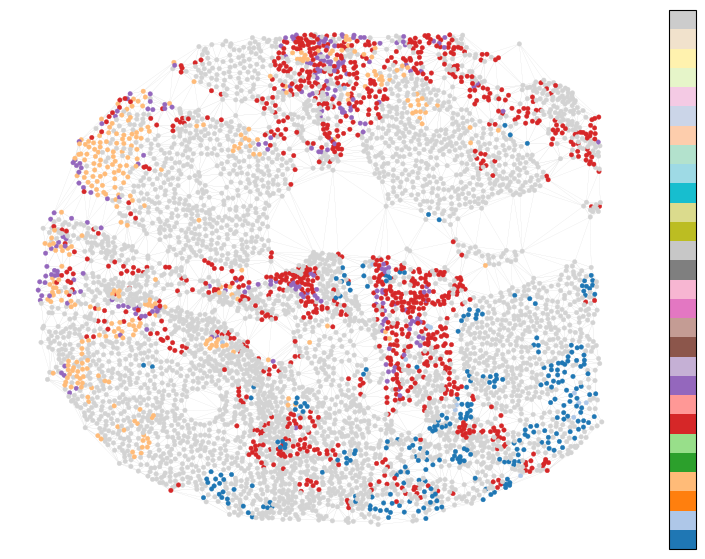

In [195]:
G_path = save_dir + "/S" + str(ID) + "_joint_concept.obj"

# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept/S3_joint_concept.obj"
G = deserialize(G_path)
visualize_cell_graph(G, key="salient", edge_flag=True)

In [196]:
# G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept"
# for i,G in enumerate(os.listdir(G_dir)):
#     G_id = int(G.split("_")[0].split("S")[1])
#     if label_dict[G_id] == 1:
#         print(G_id, label_dict[G_id])
#         G_path = os.path.join(G_dir, G)
#         G = deserialize(G_path)
#         visualize_cell_graph(G, key="concept", edge_flag=False)
#     if i > 10:
#         break
        

# bar charts per datum

In [197]:
# from utils import visualize_cell_graph, deserialize
# G_path = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept/S279_joint_concept.obj"
# G = deserialize(G_path)
# visualize_cell_graph(G, key="concept", edge_flag=False)

In [198]:
G.nodes[0].keys()

dict_keys(['voronoi_polygon', 'cell_id', 'center_coord', 'cell_type', 'biomarker_expression', 'AREA_CELL', 'ECCENTRICITY', 'MAJORAXISLENGTH', 'MINORAXISLENGTH', 'PERIMETER', 'emb', 'raw', 'concept', 'salient'])

In [199]:
from test_signal import graph2df
dfG = graph2df(G, ["cell_id", "cell_type", "concept", "salient", "emb", "raw"])

In [200]:
dfG["salbin"] = np.where(np.isnan(dfG['salient']), "non-salient", "salient")


In [201]:
dfG.head()

,node,cell_id,cell_type,concept,salient,emb,raw,salbin
0,0,3398.0,2.0,8,NaN,"[-0.98984975, -0.68301225, -0.0, -0.0, -1.0105...","[7.601771344262561, 7.794182088300973, 7.67151...",non-salient
1,1,3146.0,2.0,8,NaN,"[-0.85869443, -0.34044024, -0.0, -1.2899234, -...","[9.37015803610451, 10.513486313735395, 8.21927...",non-salient
2,2,5482.0,2.0,4,NaN,"[-0.47870672, -1.0336318, -3.663166, -3.677226...","[9.503653088583208, 11.492510442036409, 8.0560...",non-salient
3,3,5396.0,2.0,4,NaN,"[-0.61080706, -0.0, -0.0, -0.0, -2.3791914, -2...","[10.001841267943432, 10.729677688814196, 8.095...",non-salient
4,4,5249.0,2.0,6,6.0,"[-0.26028693, -0.83189404, -2.7318215, -3.2538...","[9.793588951553716, 11.068146054293026, 8.3231...",salient


In [202]:
dfG.shape

(5903, 8)

In [214]:
# dfG["concept"]

In [204]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
joint_cmap = colors.ListedColormap(cm.tab20.colors + cm.Pastel2.colors, name='tab40')
joint_cmap.set_bad(color='lightgray') #used to be white

In [205]:
cs = joint_cmap([0,1,2,3,4,5,6,7,8])

<Figure size 640x480 with 0 Axes>

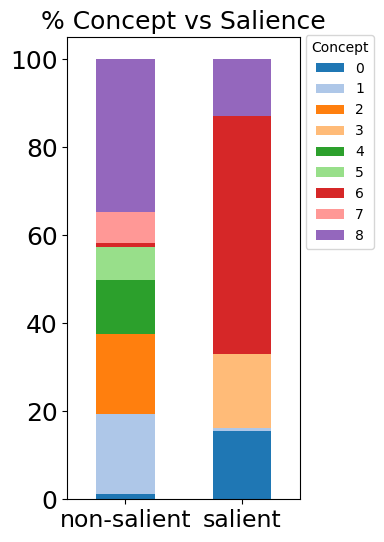

In [206]:
percent = pd.crosstab(dfG.salbin, dfG.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 1.02), loc='upper right', title="Concept")
plt.title("% Concept vs Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

In [207]:
colors_type = ["thistle", "orchid"] # plum
cmap_type = colors.ListedColormap(colors_type)
norm_type = colors.BoundaryNorm(np.arange(0.5,3), cmap_type.N) 

<Figure size 640x480 with 0 Axes>

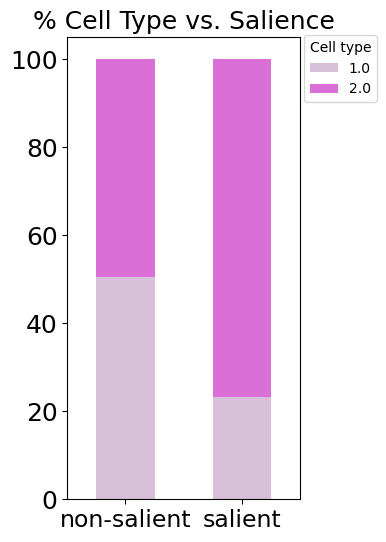

In [208]:
percent = pd.crosstab(dfG.salbin, dfG.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type vs. Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

In [209]:
colors_salcells = ["lightgray", "red"]
cmap_salcells = colors.ListedColormap(colors_salcells)
norm_salcells = colors.BoundaryNorm(np.arange(-0.5,2), cmap_salcells.N) 


<Figure size 640x480 with 0 Axes>

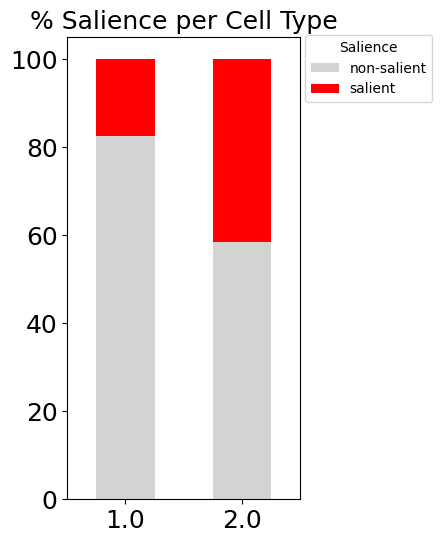

In [210]:
percent = pd.crosstab(dfG.cell_type, dfG.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

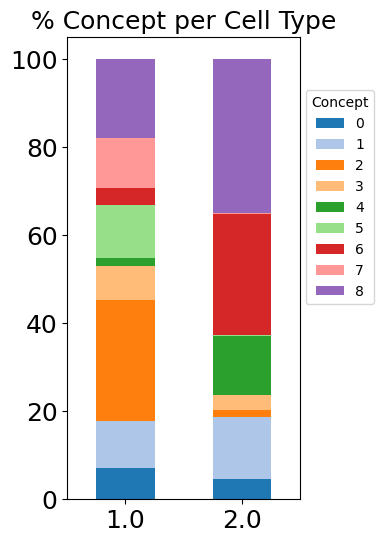

In [211]:
percent = pd.crosstab(dfG.cell_type, dfG.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 0.9), loc='upper right', title="Concept")
plt.title("% Concept per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

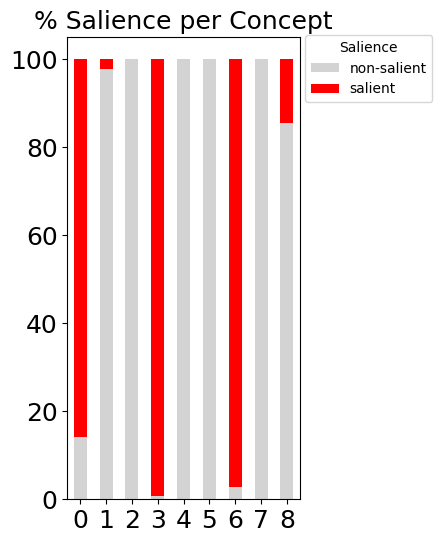

In [212]:
percent = pd.crosstab(dfG.concept, dfG.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Concept", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

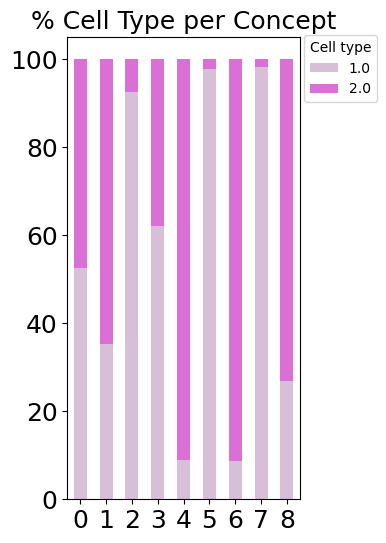

In [213]:
percent = pd.crosstab(dfG.concept, dfG.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type per Concept", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## Bar charts over all of Class-1

In [251]:
G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_concept_overlay"
cell_dfs = []

for i,G in enumerate(os.listdir(G_dir)):
    G_id = int(G.split("_")[0].split("S")[1])
    if label_dict[G_id] == 1:
        # print(G_id, label_dict[G_id])
        G_path = os.path.join(save_dir, G)
        G = deserialize(G_path)
        
        dfG = graph2df(G, ["cell_id", "cell_type", "concept", "salient", "emb", "raw"])
        dfG["salbin"] = np.where(np.isnan(dfG['salient']), "non-salient", "salient")
        cell_dfs.append(dfG)

dfGs = pd.concat(cell_dfs, ignore_index=True)

213 1
445 1
279 1
215 1
225 1
41 1
53 1
413 1
129 1
292 1
138 1
30 1
185 1
189 1
42 1
208 1
79 1
38 1
249 1
201 1
106 1
320 1
300 1
328 1
172 1
259 1
430 1
281 1
302 1
260 1
217 1
196 1
257 1
436 1
211 1
206 1
288 1
318 1
197 1
93 1
87 1
146 1
231 1
37 1
66 1
123 1
104 1
195 1
76 1
143 1
287 1
153 1
68 1
444 1
415 1
275 1
295 1
324 1
262 1
57 1
105 1
148 1
64 1
290 1
85 1
131 1
317 1
74 1
304 1
126 1
178 1
280 1
312 1
181 1
59 1
43 1
160 1
278 1
425 1
440 1
96 1
308 1
243 1
158 1
92 1
113 1
296 1
44 1
236 1
291 1
7 1
238 1
437 1
97 1
246 1
282 1
298 1
270 1
247 1
416 1
69 1
289 1
449 1
159 1
207 1
307 1
428 1
327 1
439 1


In [258]:
dfGs.shape

(613059, 8)

<Figure size 640x480 with 0 Axes>

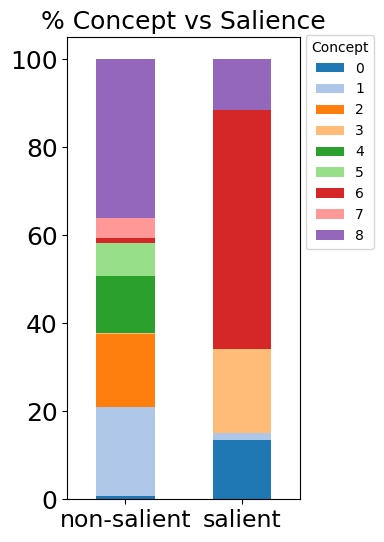

In [252]:
percent = pd.crosstab(dfGs.salbin, dfGs.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 1.02), loc='upper right', title="Concept")
plt.title("% Concept vs Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

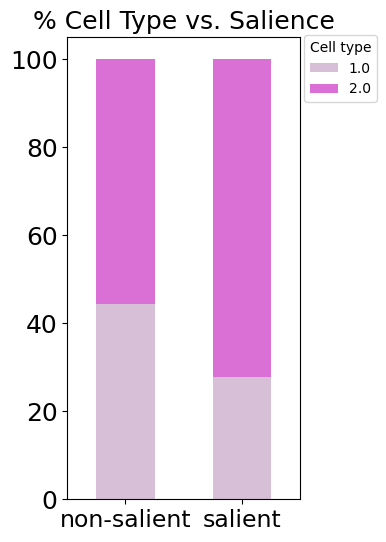

In [253]:
percent = pd.crosstab(dfGs.salbin, dfGs.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type vs. Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

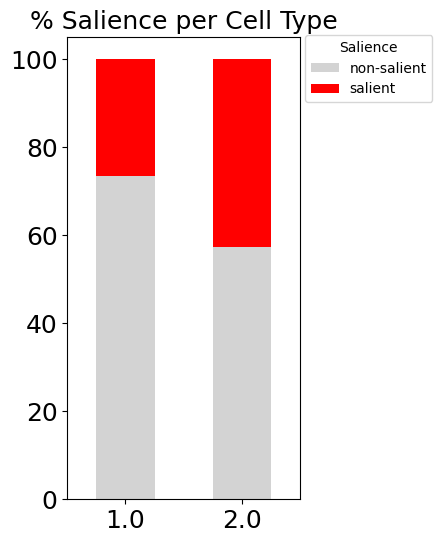

In [254]:
percent = pd.crosstab(dfGs.cell_type, dfGs.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

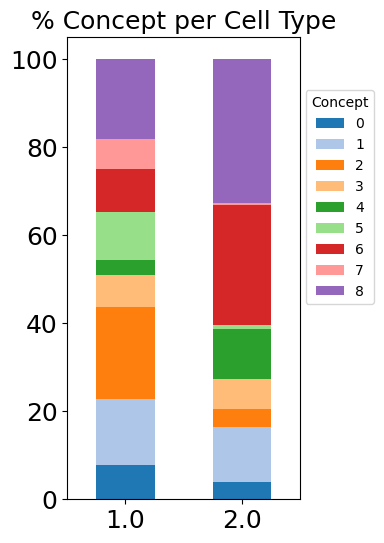

In [255]:
percent = pd.crosstab(dfGs.cell_type, dfGs.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 0.9), loc='upper right', title="Concept")
plt.title("% Concept per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

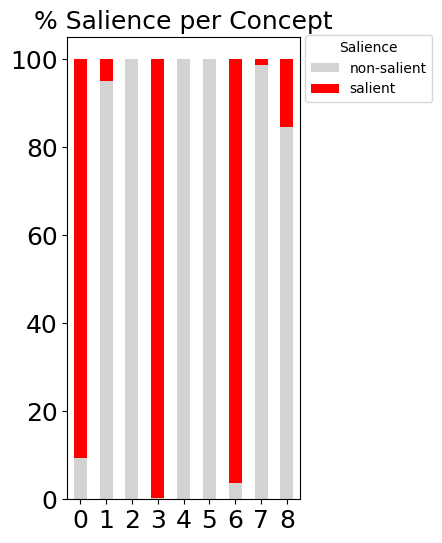

In [256]:
percent = pd.crosstab(dfGs.concept, dfGs.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Concept", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

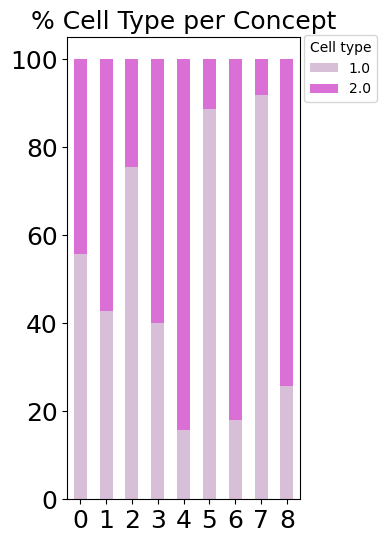

In [257]:
percent = pd.crosstab(dfGs.concept, dfGs.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type per Concept", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## Statistics

In [215]:
for i in range(9):
    dfG["is_" + str(i)] = np.where(dfG['concept'] == i, 1, 0)


In [223]:
dfG["salbin_num"] = np.where(dfG['salbin'] == "salient", 1, 0)


In [224]:
dfG.head()

,node,cell_id,cell_type,concept,salient,emb,raw,salbin,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,salbin_num
0,0,3398.0,2.0,8,NaN,"[-0.98984975, -0.68301225, -0.0, -0.0, -1.0105...","[7.601771344262561, 7.794182088300973, 7.67151...",non-salient,0,0,0,0,0,0,0,0,1,0
1,1,3146.0,2.0,8,NaN,"[-0.85869443, -0.34044024, -0.0, -1.2899234, -...","[9.37015803610451, 10.513486313735395, 8.21927...",non-salient,0,0,0,0,0,0,0,0,1,0
2,2,5482.0,2.0,4,NaN,"[-0.47870672, -1.0336318, -3.663166, -3.677226...","[9.503653088583208, 11.492510442036409, 8.0560...",non-salient,0,0,0,0,1,0,0,0,0,0
3,3,5396.0,2.0,4,NaN,"[-0.61080706, -0.0, -0.0, -0.0, -2.3791914, -2...","[10.001841267943432, 10.729677688814196, 8.095...",non-salient,0,0,0,0,1,0,0,0,0,0
4,4,5249.0,2.0,6,6.0,"[-0.26028693, -0.83189404, -2.7318215, -3.2538...","[9.793588951553716, 11.068146054293026, 8.3231...",salient,0,0,0,0,0,0,1,0,0,1


In [229]:
from scipy.stats import chi2_contingency
import scipy.stats as ss

for i in range(9):
    table = pd.crosstab(dfG.salbin_num, dfG["is_" + str(i)])
    result_test = chi2_contingency(table)
    print(result_test)
    
print()
print("Combined")
print()
table = pd.crosstab(dfG.salbin_num, dfG["concept"])
result_test = chi2_contingency(table)
print(result_test)

table = pd.crosstab(dfG.salbin_num, dfG["cell_type"])
result_test = chi2_contingency(table)
print(result_test)

Chi2ContingencyResult(statistic=483.5005229184181, pvalue=3.6986514373611057e-107, dof=1, expected_freq=array([[3820.58783669,  228.41216331],
       [1749.41216331,  104.58783669]]))
Chi2ContingencyResult(statistic=340.21889528902807, pvalue=5.717407497217107e-76, dof=1, expected_freq=array([[3534.55819075,  514.44180925],
       [1618.44180925,  235.55819075]]))
Chi2ContingencyResult(statistic=383.34808830834794, pvalue=2.322940611022166e-85, dof=1, expected_freq=array([[3544.16110452,  504.83889548],
       [1622.83889548,  231.16110452]]))
Chi2ContingencyResult(statistic=700.2685382385702, pvalue=2.6140191584895193e-154, dof=1, expected_freq=array([[3835.67812976,  213.32187024],
       [1756.32187024,   97.67812976]]))
Chi2ContingencyResult(statistic=249.63495306027636, pvalue=3.1190578662820233e-56, dof=1, expected_freq=array([[3704.66694901,  344.33305099],
       [1696.33305099,  157.66694901]]))
Chi2ContingencyResult(statistic=145.73241544694758, pvalue=1.4853863843375131e-33,

In [239]:
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)
            
        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True
    
        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]
            
        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [250]:
for i in range(9):
    result_test = cramers_corrected_stat(dfG.salbin_num, dfG["is_" + str(i)])
    print("cramer corr (concept i==" + str(i) + " vs salience):", result_test)
    result_test = cramers_corrected_stat(dfG.cell_type, dfG["is_" + str(i)])
    print("cramer corr (concept i==" + str(i) + " vs cell type):", result_test)
    print()
    

print()
result_test = cramers_corrected_stat(dfG.salbin_num, dfG["concept"])
print("cramer corr (concept vs salience):", result_test)

result_test = cramers_corrected_stat(dfG.cell_type, dfG["concept"])
print("cramer corr (cell type vs concept):", result_test)

result_test = cramers_corrected_stat(dfG.salbin_num, dfG.cell_type)
print("cramer corr (cell type vs salience):", result_test)

cramer corr (concept i==0 vs salience): 0.286715
cramer corr (concept i==0 vs cell type): 0.051286

cramer corr (concept i==1 vs salience): 0.240289
cramer corr (concept i==1 vs cell type): 0.049969

cramer corr (concept i==2 vs salience): 0.255078
cramer corr (concept i==2 vs cell type): 0.387285

cramer corr (concept i==3 vs salience): 0.345027
cramer corr (concept i==3 vs cell type): 0.095592

cramer corr (concept i==4 vs salience): 0.205905
cramer corr (concept i==4 vs cell type): 0.202985

cramer corr (concept i==5 vs salience): 0.157424
cramer corr (concept i==5 vs cell type): 0.263835

cramer corr (concept i==6 vs salience): 0.652549
cramer corr (concept i==6 vs cell type): 0.308967

cramer corr (concept i==7 vs salience): 0.15271
cramer corr (concept i==7 vs cell type): 0.258538

cramer corr (concept i==8 vs salience): 0.226063
cramer corr (concept i==8 vs cell type): 0.188069


cramer corr (concept vs salience): 0.877616
cramer corr (cell type vs concept): 0.645094
cramer corr

## Ridgeline plots

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# # Generate sample data
# np.random.seed(42)
# data = pd.DataFrame({
#     'value': np.concatenate([np.random.normal(loc=0, scale=1, size=100), np.random.normal(loc=5, scale=1, size=100)]),
#     'group': ['Salient']*100 + ['Non-salient']*100,
#     'channel': np.concatenate([np.repeat([f'Channel {i+1}' for i in range(5)], 20), np.repeat([f'Channel {i+1}' for i in range(5)], 20)])
# })

# # Create the ridgeline plot
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='value', y='channel', hue='group', data=data, split=True, inner='quart', palette='muted')

# # Add title and labels
# plt.title('Salient vs non-salient cell expression')
# plt.xlabel('Expression')
# plt.ylabel('Channels')

# # Show the plot
# plt.legend(title='Salience')
# plt.show()